Objective:
● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

● As a security/defense analyst, try to find out the hot zone of terrorism.



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [2]:
ter=pd.read_csv(r"C:\Users\Hp\Downloads\globalterrorismdb_0718dist.csv\globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

C:\Users\Hp\AppData\Local\Temp\ipykernel_17344\4121951359.py:1: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
ter.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
ter.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
ter.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [6]:
ter.shape

(181691, 135)

In [7]:
for i in ter.columns:
    print(i, end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

# cleaning the data

In [8]:
ter=ter[[ 'iyear', 'imonth', 'iday', 'approxdate','country_txt','region_txt','provstate','location', 'city', 'latitude', 'longitude','attacktype1','summary',
        'targtype1_txt','target1','gname','nwound','addnotes','nkill','motive']]

In [9]:
ter.head()

,iyear,imonth,iday,approxdate,country_txt,region_txt,provstate,location,city,latitude,longitude,attacktype1,summary,targtype1_txt,target1,gname,nwound,addnotes,nkill,motive
0,1970,7,2,NaN,Dominican Republic,Central America & Caribbean,NaN,NaN,Santo Domingo,18.456792,-69.951164,1,NaN,Private Citizens & Property,Julio Guzman,MANO-D,0.0,NaN,1.0,NaN
1,1970,0,0,NaN,Mexico,North America,Federal,NaN,Mexico city,19.371887,-99.086624,6,NaN,Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,0.0,NaN,0.0,NaN
2,1970,1,0,NaN,Philippines,Southeast Asia,Tarlac,NaN,Unknown,15.478598,120.599741,1,NaN,Journalists & Media,Employee,Unknown,0.0,NaN,1.0,NaN
3,1970,1,0,NaN,Greece,Western Europe,Attica,NaN,Athens,37.997490,23.762728,3,NaN,Government (Diplomatic),U.S. Embassy,Unknown,NaN,NaN,NaN,NaN
4,1970,1,0,NaN,Japan,East Asia,Fukouka,NaN,Fukouka,33.580412,130.396361,7,NaN,Government (Diplomatic),U.S. Consulate,Unknown,NaN,NaN,NaN,NaN


In [10]:
ter.isnull().sum()

iyear                 0
imonth                0
iday                  0
approxdate       172452
country_txt           0
region_txt            0
provstate           421
location         126196
city                434
latitude           4556
longitude          4557
attacktype1           0
summary           66129
targtype1_txt         0
target1             636
gname                 0
nwound            16311
addnotes         153402
nkill             10313
motive           131130
dtype: int64

In [11]:
ter['nkill']=ter['nkill'].fillna(0)
ter['nwound']=ter['nwound'].fillna(0)
ter['Casuality']=ter['nkill']+ter['nwound']

In [12]:
ter.describe()

,iyear,imonth,iday,latitude,longitude,attacktype1,nwound,nkill,Casuality
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,3.247547,2.883296,2.266860,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,1.915772,34.309747,11.227057,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,2.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,3.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,3.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,9.000000,8191.000000,1570.000000,9574.000000


# destructive feature of data

1. year wise attacks

In [13]:
attacks=ter['iyear'].value_counts(dropna = False).sort_index().reset_index().rename(columns={'index':'Year','iyear':'attacks'})
attacks
#sort index arranges the years inn ascending order
#dropna=false helps in counting those values as well which are nan

,Year,attacks
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581
5,1975,740
6,1976,923
7,1977,1319
8,1978,1526
9,1979,2662


In [14]:
print("City with the most attacks:",ter['city'].value_counts().idxmax())

City with the most attacks: Unknown


In [15]:
print("Most Attack Types:",ter['attacktype1'].value_counts().idxmax())

Most Attack Types: 3


In [16]:
print("group:",ter['gname'].value_counts().index[1])

group: Taliban


C:\Users\Hp\AppData\Local\Temp\ipykernel_17344\1705702768.py:3: FutureWarning:

In a future version of pandas all arguments of Series.dropna will be keyword-only.



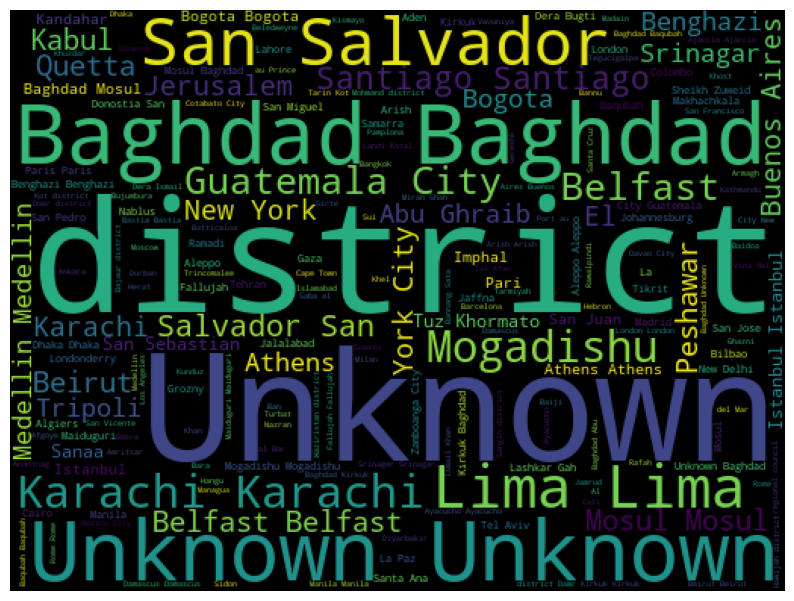

In [17]:
from wordcloud import WordCloud
from scipy import signal
cities = ter.city.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'black',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# data visualization

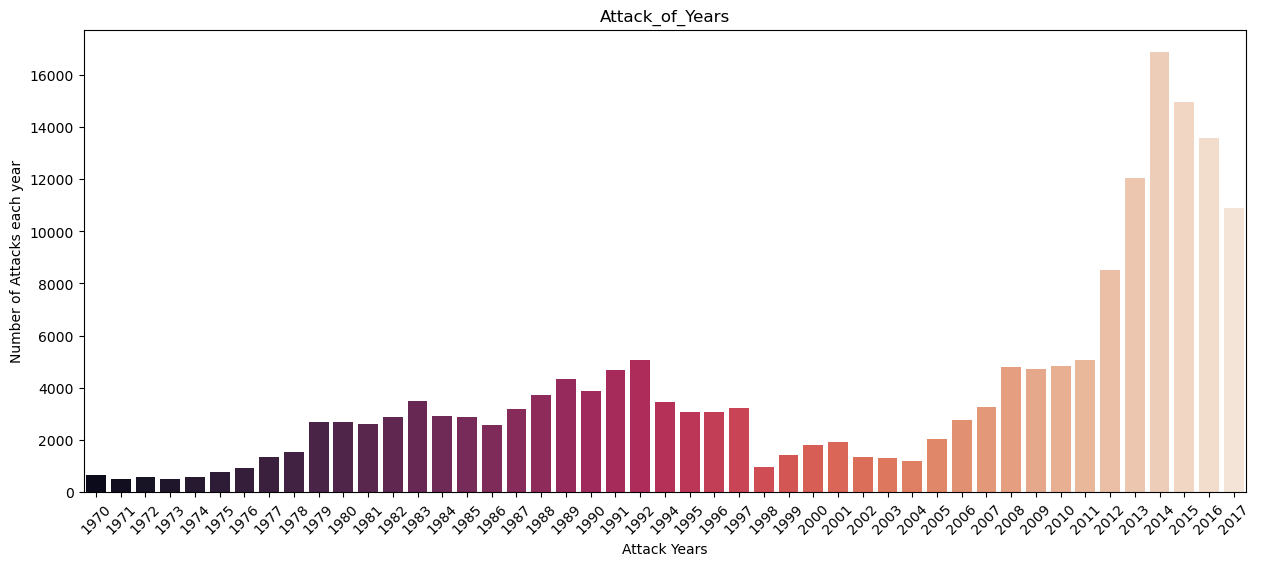

In [18]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,6)
x_year = ter['iyear'].unique()
y_count_years = ter['iyear'].value_counts(dropna = False).sort_index()
sns.barplot(x=x_year,y=y_count_years,palette='rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Years')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

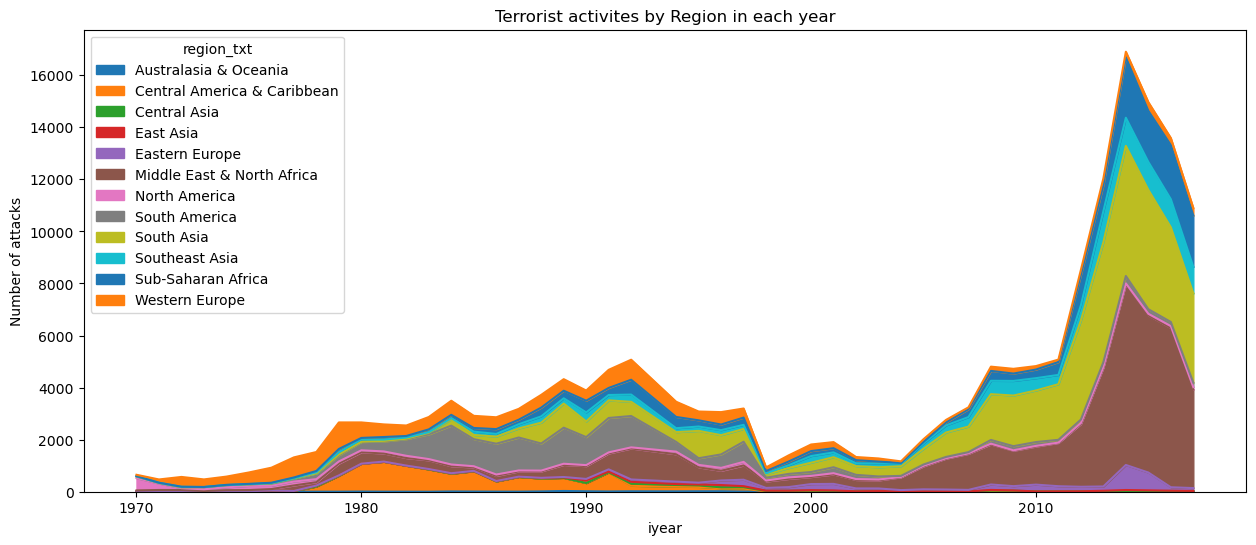

In [19]:
#Area plot
pd.crosstab(ter.iyear,ter.region_txt).plot(kind='area',figsize=(15,6))
plt.title('Terrorist activites by Region in each year')
plt.ylabel("Number of attacks")
plt.show()

In [20]:
#Taking only 30 countries for visualization of heatmap properly
terror_copy = ter.sort_values(by='Casuality',ascending=False)[:30]
terror_copy.corr()

C:\Users\Hp\AppData\Local\Temp\ipykernel_17344\2502657052.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,iyear,imonth,iday,latitude,longitude,attacktype1,nwound,nkill,Casuality
iyear,1.000000,-0.032080,-0.169634,0.003728,0.150097,-0.201242,-0.249850,0.132656,-0.203149
imonth,-0.032080,1.000000,-0.270759,0.314738,-0.398737,-0.111789,0.101020,0.105265,0.112755
iday,-0.169634,-0.270759,1.000000,-0.057494,0.198550,-0.001672,-0.032207,-0.171906,-0.062604
latitude,0.003728,0.314738,-0.057494,1.000000,-0.223085,0.295764,0.131062,-0.017608,0.116579
longitude,0.150097,-0.398737,0.198550,-0.223085,1.000000,0.119137,-0.258780,-0.196272,-0.274700
attacktype1,-0.201242,-0.111789,-0.001672,0.295764,0.119137,1.000000,0.164222,0.006925,0.151660
nwound,-0.249850,0.101020,-0.032207,0.131062,-0.258780,0.164222,1.000000,0.354211,0.983632
nkill,0.132656,0.105265,-0.171906,-0.017608,-0.196272,0.006925,0.354211,1.000000,0.516918
Casuality,-0.203149,0.112755,-0.062604,0.116579,-0.274700,0.151660,0.983632,0.516918,1.000000


C:\Users\Hp\AppData\Local\Temp\ipykernel_17344\2346936727.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



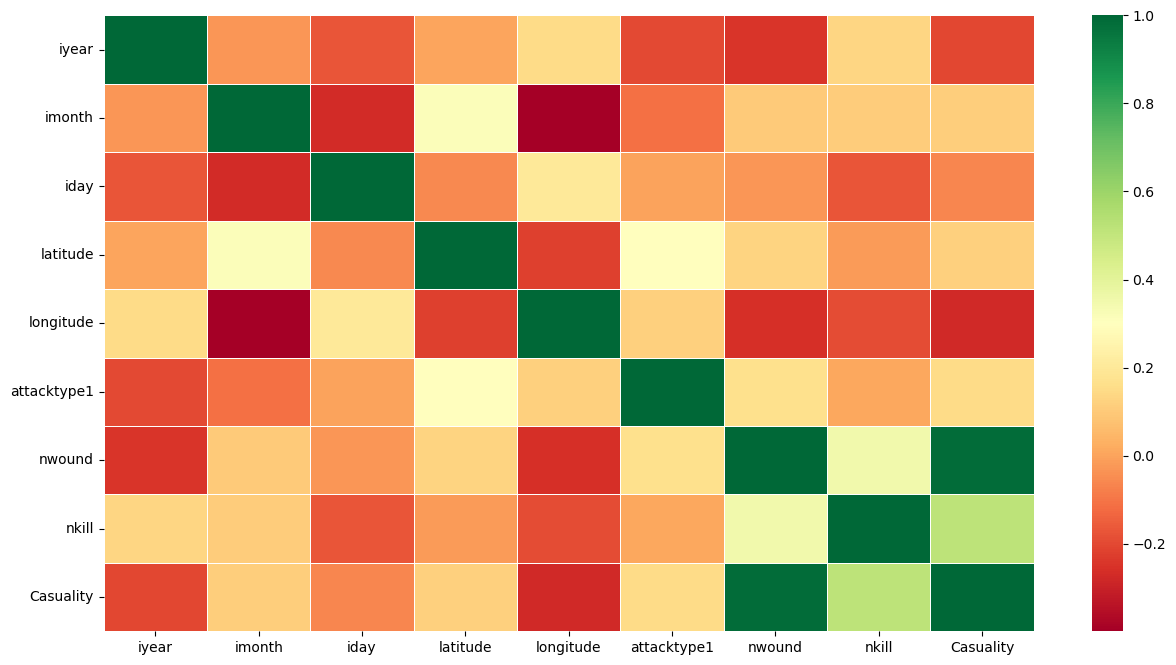

In [21]:
#Generating heatmap for correlation ploy
plt.figure(figsize=[15,8])
sns.heatmap(terror_copy.corr(),cmap='RdYlGn', linewidths=0.4)
plt.show()

In [22]:
terror1 = ter.sort_values(by='Casuality',ascending=False)[:40]

In [23]:
heat=terror1.pivot_table(index='country_txt',columns='iyear',values='Casuality')
heat.fillna(0,inplace=True)

In [24]:
heat.head()

iyear,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
country_txt,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [26]:

attack_count=ter.country_txt.value_counts()[:15]
attack_count

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: country_txt, dtype: int64

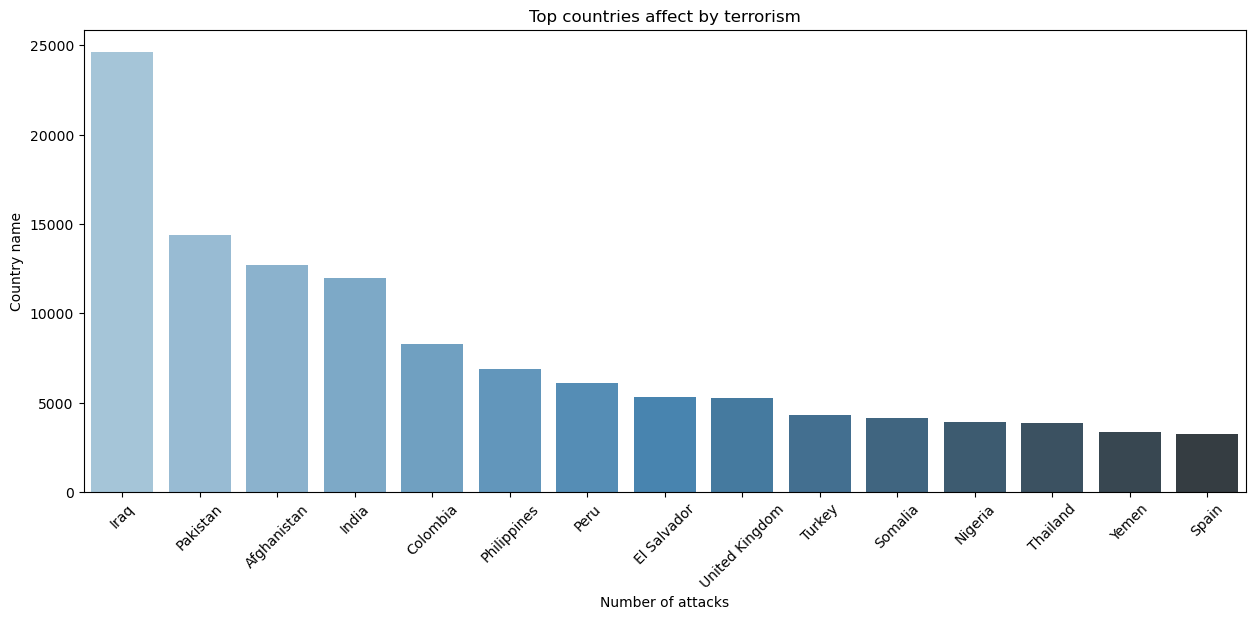

In [27]:
#top countries affected by terrorism
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,6)

y_country = attack_count.index
sns.barplot(x=y_country,y=attack_count ,palette='Blues_d')
plt.xticks(rotation = 45)
plt.xlabel('Number of attacks')
plt.ylabel('Country name')
plt.title('Top countries affect by terrorism')
plt.show()


In [28]:
attacks_grp=ter.gname.value_counts()[:15]
attacks_grp

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
Name: gname, dtype: int64

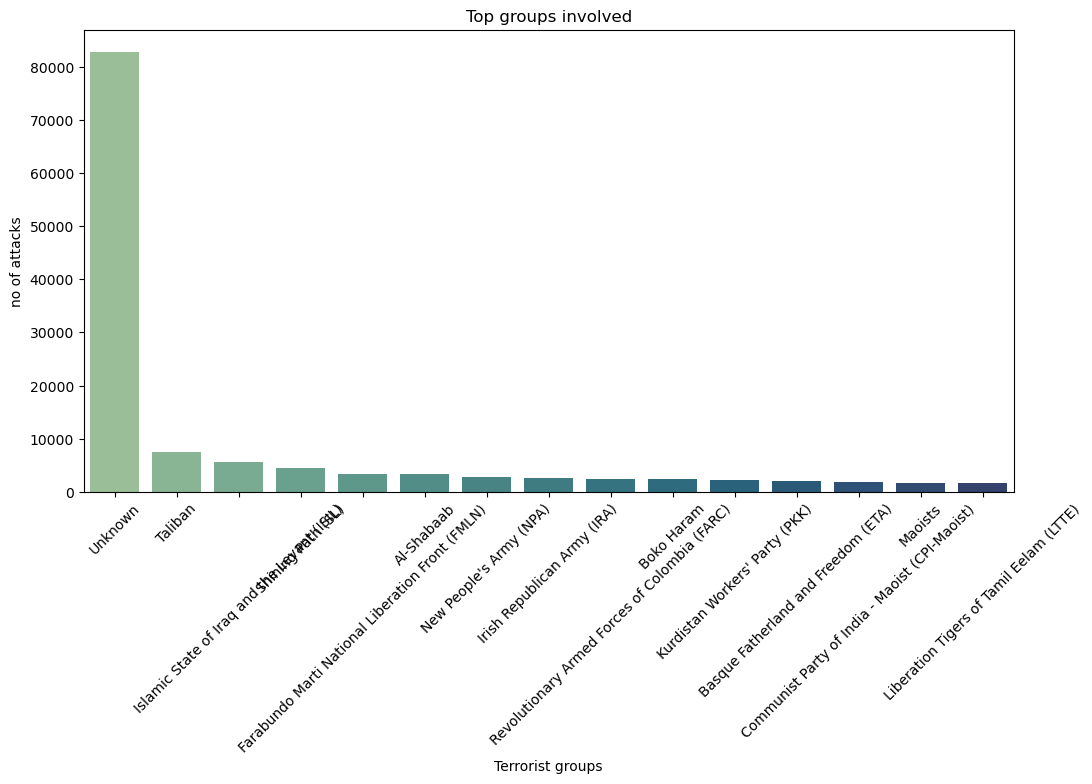

In [29]:
#groups involving most in terrorism
plt.subplots(figsize=(12,6))
y_country = attacks_grp.index
sns.barplot(x=y_country,y=attacks_grp ,palette='crest')
plt.xticks(rotation = 45)
plt.xlabel('Terrorist groups')
plt.ylabel('no of attacks')
plt.title('Top groups involved')
plt.show()


# interactive maps

In [30]:
import folium
from folium.plugins import MarkerCluster 
filterYear = ter['iyear'] == 1970

In [31]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [32]:
import folium
from folium.plugins import MarkerCluster 
filterYear = ter['iyear'] == 1970

In [33]:
filterData = ter[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [34]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [35]:
ter.gname.value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: gname, dtype: int64

In [36]:
test=ter[ter.gname.isin(['Taliban','Islamic State of Iraq and the Levant (ISIL)','Shining Path (SL)'])]

In [37]:
test.country_txt.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [38]:
terror_df_group = ter.dropna(subset=['latitude','longitude'])
terror_df_group = terror_df_group.drop_duplicates(subset=['country_txt','gname'])
terrorist_groups = ter.gname.value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group.gname.isin(terrorist_groups)]
print(terror_df_group.gname.unique())

["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


In [39]:
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['gname'], 
                  terror_df_group.iloc[i]['country_txt'])).add_to(map)
map

In [40]:
m1 = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
marker_cluster = MarkerCluster(
    name='clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)
for i in range(0,len(terror_df_group)):
    marker=folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']]) 
    popup='gname:{}<br>country_txt:{}'.format(terror_df_group.iloc[i]['gname'],
                                          terror_df_group.iloc[i]['country_txt'])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
marker_cluster.add_to(m1)
# Use Stamen Terrain tileset
folium.TileLayer('stamenterrain').add_to(m1)

# Add other tile layers
folium.TileLayer('openstreetmap').add_to(m1)
folium.TileLayer('cartodbdark_matter').add_to(m1)

# Add layer control
folium.LayerControl().add_to(m1)

m1





## Conclusion

In conclusion, this exploratory data analysis of global terrorism data has provided valuable insights into the patterns, trends, and dynamics of terrorist activities around the world. By delving into the dataset and applying various analytical techniques, we have gained a deeper understanding of the complex nature of terrorism and its impacts on different regions and countries.

**Key Findings**:

Throughout this analysis, several significant findings have emerged:

1. **Temporal Trends:** We observed that the frequency of terrorist incidents has varied over time, with certain periods experiencing spikes in activity. These fluctuations might be influenced by socio-political events, policy changes, or other global factors.

2. **Geographical Distribution:** The distribution of terrorist incidents is not uniform across regions. Some areas are more prone to attacks, highlighting the need for region-specific counter-terrorism strategies.

3. **Common Attack Types:** Certain attack types, such as bombings and armed assaults, are more prevalent than others. Understanding these trends can aid in targeting preventive measures effectively.

4. **Top Affected Countries:** Several countries consistently rank among the most affected by terrorism. Studying their unique challenges and responses can inform global counter-terrorism efforts.

5. **Terrorist Groups:** Analyzing the most active terrorist groups revealed insights into their motives, affiliations, and areas of operation. Uncovering such details is crucial for effective counter-terrorism strategies.

**Limitations and Future Work:**

It's important to acknowledge the limitations of this analysis. The dataset might not capture all incidents, and data quality issues can affect the accuracy of findings. Future work could involve incorporating additional data sources for more comprehensive insights and exploring predictive modeling to anticipate potential trends.

**Implications:**

The insights gained from this analysis can contribute to informed policy decisions, resource allocation, and international collaborations to address the global threat of terrorism. By understanding the underlying factors driving terrorism, stakeholders can work towards sustainable solutions that promote peace and security.

**Takeaways:**

As we conclude this analysis, it's evident that EDA is a powerful tool for uncovering meaningful insights from data. This project has not only enhanced our understanding of global terrorism but also demonstrated the importance of data-driven approaches in addressing complex societal challenges.
